<a href="https://colab.research.google.com/github/jiashenyue/ca-wui-pop-increase/blob/main/project_2_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preparation**

- Shenyue Jia | [jiashenyue.info](https://www.jiashenyue.info/)

##**0. Overview**

- Prepare the data to estimate the drivers of population increase inside California's Wildland-Urban Interface (WUI), a high-risk zone of wildfire during the past decade (2010-2019)

###**Data dictionary**

- [TO DO] data dictionary

##**1. Data preparation**

###**1.1 Data inspection**

In [44]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# inspect data
url = 'https://drive.google.com/file/d/1itah7kfdgRi7B_oRnHYr0n5LRdG9sefQ/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,id,county,county_pop_19,mk_pop,pval_mk,slp_pop,pval_ols,coef_pop,pval_poisson,WUICLASS10_tract,WUIFLAG10_tract,COUNTYFP10,pop10,tract_area,WHPWeigh_1,CNTY_AREA,pop19,pop_diff
0,6037500403,Los Angeles County,10081570,-0.377778,0.152406,-49.915152,0.075146,-0.011813,3.101268e-12,High_Dens_Interface,2,37,4067,2.246968e+06,0.505911,1.230099e+10,3829,-238
1,6065045103,Riverside County,2411439,-0.629253,0.015322,-96.157576,0.000582,-0.025473,9.175103e-46,Med_Dens_Interface,2,65,4107,2.344179e+07,1.793173,1.891490e+10,3557,-550
2,6065046404,Riverside County,2411439,0.777778,0.002357,244.018182,0.000609,0.040807,1.123356e-179,High_Dens_Interface,2,65,4723,1.064512e+07,1.793173,1.891490e+10,6661,1938
3,6065045108,Riverside County,2411439,0.733333,0.004207,212.963636,0.000026,0.034908,7.490726e-135,High_Dens_Interface,2,65,5082,2.683460e+06,1.793173,1.891490e+10,6767,1685
4,6037122122,Los Angeles County,10081570,0.822222,0.001282,80.933333,0.000049,0.034606,5.562206e-52,High_Dens_Interface,2,37,1964,1.032659e+06,0.505911,1.230099e+10,2728,764


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3364 non-null   int64  
 1   county            3364 non-null   object 
 2   county_pop_19     3364 non-null   int64  
 3   mk_pop            3364 non-null   float64
 4   pval_mk           3364 non-null   float64
 5   slp_pop           3364 non-null   float64
 6   pval_ols          3363 non-null   float64
 7   coef_pop          3364 non-null   float64
 8   pval_poisson      3364 non-null   float64
 9   WUICLASS10_tract  3364 non-null   object 
 10  WUIFLAG10_tract   3364 non-null   int64  
 11  COUNTYFP10        3364 non-null   int64  
 12  pop10             3364 non-null   int64  
 13  tract_area        3364 non-null   float64
 14  WHPWeigh_1        3364 non-null   float64
 15  CNTY_AREA         3364 non-null   float64
 16  pop19             3364 non-null   int64  


###**1.2 Target variable**

- **Option 1: use `coef_pop` column as target variable**
  - Coefficient of Poisson regression
- **Option 2: use `pop_diff` column as the target variable**
  - Population difference between 2019 and 2010

In [47]:
# check other variables in the data to decide the preprocessing pipeline
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3364 non-null   int64  
 1   county            3364 non-null   object 
 2   county_pop_19     3364 non-null   int64  
 3   mk_pop            3364 non-null   float64
 4   pval_mk           3364 non-null   float64
 5   slp_pop           3364 non-null   float64
 6   pval_ols          3363 non-null   float64
 7   coef_pop          3364 non-null   float64
 8   pval_poisson      3364 non-null   float64
 9   WUICLASS10_tract  3364 non-null   object 
 10  WUIFLAG10_tract   3364 non-null   int64  
 11  COUNTYFP10        3364 non-null   int64  
 12  pop10             3364 non-null   int64  
 13  tract_area        3364 non-null   float64
 14  WHPWeigh_1        3364 non-null   float64
 15  CNTY_AREA         3364 non-null   float64
 16  pop19             3364 non-null   int64  


In [48]:
# copy the original data and drop the first column for EDA
eda_df = df.copy()

eda_df.head()

,id,county,county_pop_19,mk_pop,pval_mk,slp_pop,pval_ols,coef_pop,pval_poisson,WUICLASS10_tract,WUIFLAG10_tract,COUNTYFP10,pop10,tract_area,WHPWeigh_1,CNTY_AREA,pop19,pop_diff
0,6037500403,Los Angeles County,10081570,-0.377778,0.152406,-49.915152,0.075146,-0.011813,3.101268e-12,High_Dens_Interface,2,37,4067,2.246968e+06,0.505911,1.230099e+10,3829,-238
1,6065045103,Riverside County,2411439,-0.629253,0.015322,-96.157576,0.000582,-0.025473,9.175103e-46,Med_Dens_Interface,2,65,4107,2.344179e+07,1.793173,1.891490e+10,3557,-550
2,6065046404,Riverside County,2411439,0.777778,0.002357,244.018182,0.000609,0.040807,1.123356e-179,High_Dens_Interface,2,65,4723,1.064512e+07,1.793173,1.891490e+10,6661,1938
3,6065045108,Riverside County,2411439,0.733333,0.004207,212.963636,0.000026,0.034908,7.490726e-135,High_Dens_Interface,2,65,5082,2.683460e+06,1.793173,1.891490e+10,6767,1685
4,6037122122,Los Angeles County,10081570,0.822222,0.001282,80.933333,0.000049,0.034606,5.562206e-52,High_Dens_Interface,2,37,1964,1.032659e+06,0.505911,1.230099e+10,2728,764


###**1.3 `coef_pop` as target variable**

In [49]:
col_pal = sns.color_palette('ch:1, r=1.45, l=.55, d=.395')
sns.color_palette('ch:1, r=1.45, l=.55, d=.395')

[(0.6671663710599731, 0.4639092574784279, 0.6833040561641264),
 (0.5944173789675091, 0.44686386017287955, 0.6879305278194555),
 (0.5144550874917323, 0.43625614508356136, 0.6777000916906704),
 (0.43233632850755416, 0.42992767975608875, 0.650398471074648),
 (0.3628802845356828, 0.4258241550971552, 0.6122790235874231),
 (0.2906687062148282, 0.42024281322903345, 0.553950436871317)]

In [50]:
## further confirm the outlier with a histogram
def box_plot(df, column_name,
             fs=(8,4), file_name='',
             tit_lab='', x_lab='', y_lab='', 
             fmt='',
             hza='center', rot=0):    
    # Variables
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()
    # Plot
    fig, ax = plt.subplots(nrows=1, figsize=fs, facecolor='w')
    sns.boxplot(data=df, x=column_name, width=.35, color=col_pal[4], ax=ax,
                medianprops={'color':'k', 'linewidth':1.5},
                whiskerprops={'color':'k', 'linewidth':1.5},
                boxprops={'facecolor':col_pal[4], 
                          'edgecolor':'k', 'linewidth':1.5},
                capprops={'color':'k', 'linewidth':1.5},
                flierprops={'marker':'o', 'markersize':8, 
                            'markerfacecolor':col_pal[4], 
                            'markeredgecolor':'k'}); 
    # Title and labels
    plt.title(tit_lab, fontsize = 16, weight='bold')
    plt.xlabel(x_lab, fontsize = 12, weight='bold')
    plt.ylabel('', fontsize = 12, weight='bold')
    # String format
    if fmt != '':
        ax.xaxis.set_major_formatter(fmt)
    # Ticks
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    # Face 
    ax.set_facecolor('w')
    # Spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Vertical lines
    ax.axvline(mean, color = 'magenta', linewidth=2, 
               label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='dotted', color = 'darkmagenta',  linewidth=2, 
               label=f'Median = {median:,.2f}')
    # Grid
    plt.grid(axis = 'x', lw=.5, c='k', alpha=.25)
    # Display
    ax.legend();
    plt.tight_layout()
    plt.show;

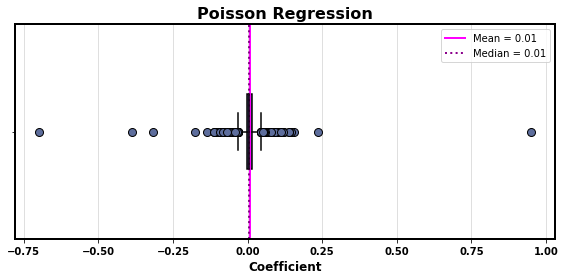

In [51]:
box_plot(eda_df, 'coef_pop',
             tit_lab='Poisson Regression', 
             fs=(8,4),
         x_lab = 'Coefficient')

####**Findings**

- There are some "outliers" in the distribution
- A very high or very low Poisson regression coefficient indicates a strong increasing/decreasing trend
- No need for extra treatment

In [52]:
# check max value
eda_df['coef_pop'].describe()

count    3364.000000
mean        0.007374
std         0.030357
min        -0.697911
25%        -0.002945
50%         0.006449
75%         0.016218
max         0.948343
Name: coef_pop, dtype: float64

###**1.4 `pop_diff` as target variable**

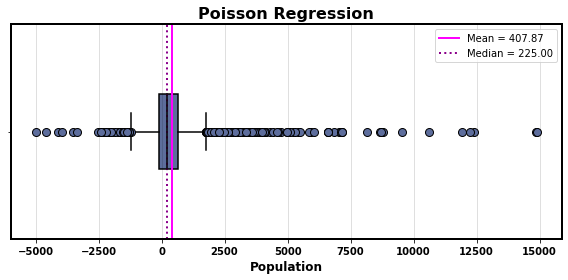

In [53]:
box_plot(eda_df, 'pop_diff',
             tit_lab='Poisson Regression', 
             fs=(8,4),
         x_lab = 'Population')

####**Findings**

- There are some outliers in the `pop_diff` column
- These are census tracts with very large (positive or negative) change of population
- No extra treatment needed

###**1.5 Check and fix data inconsistency**

- Check if there is any inconsistenty in categorical variables

In [54]:
# get index for selected cols
data_types = eda_df.dtypes
cols = data_types[data_types=='object'].index
cols

Index(['county', 'WUICLASS10_tract'], dtype='object')

In [55]:
# loop over cols to print unique values
for col in cols:
 print(f"The unique values of the feature {col} are:\n")
 print(eda_df[col].value_counts())
 print("\n")

The unique values of the feature county are:

Los Angeles County        507
Riverside County          326
San Diego County          266
San Bernardino County     203
Contra Costa County       179
Alameda County            156
Orange County             151
Santa Clara County        138
Ventura County            115
Sonoma County              91
San Mateo County           89
Solano County              84
Sacramento County          74
Kern County                66
Santa Barbara County       63
Monterey County            62
Placer County              58
Marin County               53
San Luis Obispo County     52
Shasta County              48
Santa Cruz County          44
Butte County               43
El Dorado County           42
Napa County                39
Fresno County              36
Tulare County              34
Humboldt County            30
Merced County              26
San Francisco County       23
Imperial County            21
Mendocino County           20
Nevada County           

#### **Findings**

- There is no inconsistency in the categorical variables


###**1.6 Check and fix missing values**

- Check if missing values are present

In [56]:
# check if missing values are present in the data
eda_df.isna().sum()

id                  0
county              0
county_pop_19       0
mk_pop              0
pval_mk             0
slp_pop             0
pval_ols            1
coef_pop            0
pval_poisson        0
WUICLASS10_tract    0
WUIFLAG10_tract     0
COUNTYFP10          0
pop10               0
tract_area          0
WHPWeigh_1          0
CNTY_AREA           0
pop19               0
pop_diff            0
dtype: int64

In [57]:
# display the percentage of missing values by column
print(eda_df.isna().sum()/len(eda_df)*100)

id                  0.000000
county              0.000000
county_pop_19       0.000000
mk_pop              0.000000
pval_mk             0.000000
slp_pop             0.000000
pval_ols            0.029727
coef_pop            0.000000
pval_poisson        0.000000
WUICLASS10_tract    0.000000
WUIFLAG10_tract     0.000000
COUNTYFP10          0.000000
pop10               0.000000
tract_area          0.000000
WHPWeigh_1          0.000000
CNTY_AREA           0.000000
pop19               0.000000
pop_diff            0.000000
dtype: float64


- We can simply drop the row with a missing value in `pval_ols`

####**Fix the `pval_ols` column**

- Drop this row

In [58]:
# calculate the row index for rows with missing values
na_rows = eda_df[eda_df['pval_ols'].isna()].index
na_rows

Int64Index([3173], dtype='int64')

In [59]:
# drop the row
eda_df.drop(labels=3173, axis=0);

In [60]:
# display the percentage of missing values by column
print(eda_df.isna().sum()/len(eda_df)*100)

id                  0.000000
county              0.000000
county_pop_19       0.000000
mk_pop              0.000000
pval_mk             0.000000
slp_pop             0.000000
pval_ols            0.029727
coef_pop            0.000000
pval_poisson        0.000000
WUICLASS10_tract    0.000000
WUIFLAG10_tract     0.000000
COUNTYFP10          0.000000
pop10               0.000000
tract_area          0.000000
WHPWeigh_1          0.000000
CNTY_AREA           0.000000
pop19               0.000000
pop_diff            0.000000
dtype: float64


In [61]:
# check if missing value still exists
eda_df['pval_ols'].isna().sum()

1

###**1.7 Check and fix duplicated values**

- Check if duplicated values are present

In [62]:
# identify duplicate rows
duplicateRows = eda_df[eda_df.duplicated()]
print(f'There are {len(duplicateRows)} duplicated rows in the dataframe')

There are 0 duplicated rows in the dataframe


##**2. EDA visualization**

###**2.1 Wildfire Hazard Potential (WHP)**

In [63]:
# Create a function to create a KDE Plot
def kde_plot(df, column_name,
             fs=(8,4), file_name='',
             tit_lab='', x_lab='', y_lab='',
             fmt='',
             hza='center', rot=0):    
    # Variables
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()
    
    # PLot
    fig, ax = plt.subplots(nrows=1, figsize=fs, facecolor='w')
    sns.kdeplot(data=df, x=column_name, 
                color=col_pal[4], linewidth=1.25, fill=True)
    
    # Title and labels
    plt.title(tit_lab, fontsize = 16, weight='bold')
    plt.xlabel(x_lab, fontsize = 12, weight='bold')
    plt.ylabel('Density', fontsize = 12, weight='bold')
    # String format
    if fmt != '':
        ax.xaxis.set_major_formatter(fmt)
    # Ticks
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    # Face 
    ax.set_facecolor('w')
    # Spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Vertical lines
    ax.axvline(mean, color = 'magenta', linewidth=2, 
               label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='dotted', color = 'darkmagenta',  linewidth=2, 
               label=f'Median = {median:,.2f}')
    # Grid
    plt.grid(lw=.5, c='k', alpha=.25)
    # Display
    ax.legend();
    plt.tight_layout()
    plt.show;
    # Save an image of the plot
    if file_name != '':
        folder_file_name = image_folder_path + file_name
        plt.savefig(folder_file_name, format='png', 
                    facecolor='w', edgecolor='w')

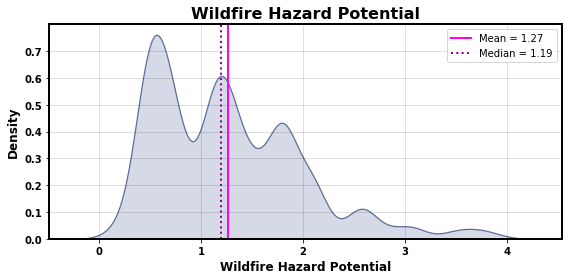

In [64]:
# Utilize function to display a KDE plot
kde_plot(eda_df, 'WHPWeigh_1',
         tit_lab='Wildfire Hazard Potential', 
         fs=(8,4),
         x_lab='Wildfire Hazard Potential')